<a href="https://colab.research.google.com/github/bundickm/DS-Unit-2-Sprint-2-Regression/blob/master/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(5)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
230,77,16500.0,3,123,1.8,3,1,2010,0
4937,67,7500.0,3,135,1.4,3,1,2010,0
5778,74,33950.0,2,65,5.7,3,1,2013,1
5435,23,16350.0,3,50,2.0,3,1,2012,0
3196,74,10200.0,3,185,1.8,3,1,2007,0


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [3]:
#split and verify with shape
X = df.drop('price', axis=1)
y = df['price']

X.shape, y.shape

((8495, 8), (8495,))

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [4]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(6796, 8) (1699, 8)
(6796,) (1699,)


## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [5]:
#Make and fit the model, played around with various features
features = ['mileage', 'engV', 'year', 'drive']

model = LinearRegression()
model.fit(X_train[features],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [6]:
#simple print statements with calls to coef and intercept
print('Coefficients:\n',model.coef_)
print('\nIntercept:', model.intercept_)

Coefficients:
 [ -44.81783125  287.28471623 1233.84063735 9334.63290904]

Intercept: -2459411.045361337


## 1.5 Use the test data to make predictions.

In [7]:
X_test['prediction'] = model.predict(X_test[features])
X_test.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,make,body,mileage,engV,engType,registration,year,drive,prediction
8221,77,2,52,2.0,3,1,2012,0,21320.359184
4552,49,3,178,2.0,3,1,2005,0,7036.427986
1535,80,1,1,1.5,3,1,2015,0,27163.948132
4228,39,3,150,2.0,1,1,2008,0,11992.849173
5623,50,2,269,2.2,0,1,2006,2,22918.568741


## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [9]:
#Not great scores, might as well pull numbers from a hat
print('RMSE:',np.sqrt(mean_squared_error(
    y_true=y_test, y_pred=X_test['prediction'])))
print('R2_Score:',r2_score(y_test,X_test['prediction']))

RMSE: 21665.88791638922
R2_Score: 0.27405643515454126


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

In [10]:
#show the coefficients with their feature
coef = pd.Series(model.coef_, X_train[features].columns)
print(coef.to_string())

mileage     -44.817831
engV        287.284716
year       1233.840637
drive      9334.632909


The coefficient represents the mean change in our response variable (y) given a one unit change in the predictor, so for every one year increase (newer car), the price of the car goes up by $1233

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

In [11]:
print('RMSE:',np.sqrt(mean_squared_error(y_true=y_test, y_pred=X_test['prediction'])))

RMSE: 21665.88791638922


The RMSE measures the average magnitude of the error in the same units as the quantity being measured, so our RMSE indicates we are off by $21,665 on average. Because of the squaring, RMSE is sensitive to large outliers. With our error being so large, it is likely the data has outliers causing issues.

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

In [12]:
print('R2_Score:',r2_score(y_test,X_test['prediction']))

R2_Score: 0.27405643515454126


The $R^2$ score is the proportion of the variance in the dependent variable that is predictable from the independent variables, in other words, our  $R^2$ says only 27% of our price data is predictable

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price variable.

Skew: 7.209566792089813


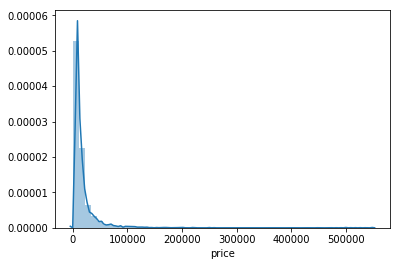

In [13]:
#Taking the log of price will result in a more normal distribution. This is
#desirable since many statistical methods expect a normal distribution.

#View price skew and distribution before log. We see peakedness and a long
#tail to the right, characteristic of log-normal distribution.
print('Skew:',df['price'].skew())
sns.distplot(df['price']);

Skew: 0.1798545299002234


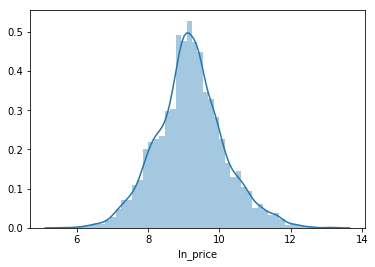

In [14]:
#Create our log price
df['ln_price'] = np.log(df['price'])

#Look at skew and distribution of log price. Normal distribution and greatly 
#reduced skew.
print('Skew:',df['ln_price'].skew())
sns.distplot(df['ln_price']);

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

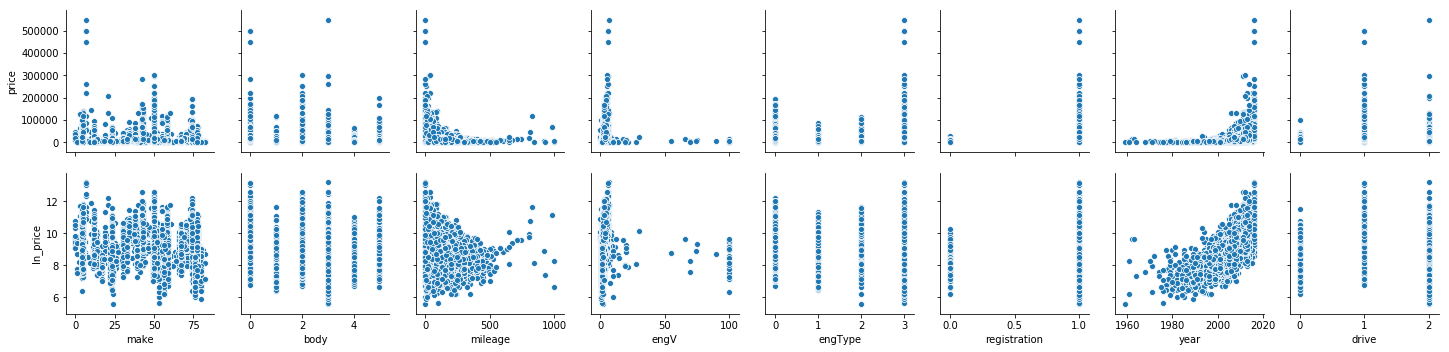

In [15]:
#pair plot of all features versus ln_price 
#and price (because I wanted to see the dif)
features = ['make', 'body', 'mileage', 'engV', 'engType', 
            'registration', 'year', 'drive']
target = ['price','ln_price']

sns.pairplot(df,y_vars=target,x_vars=features);

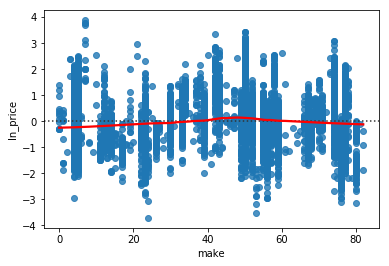

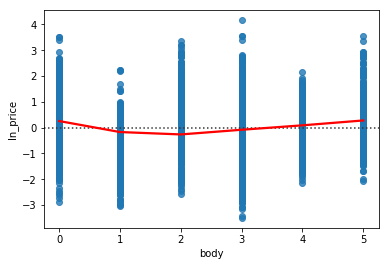

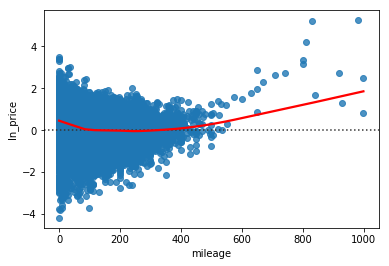

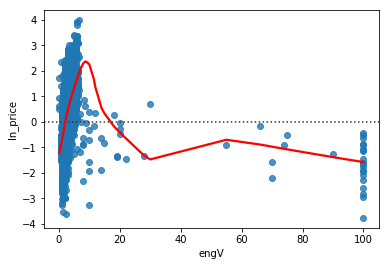

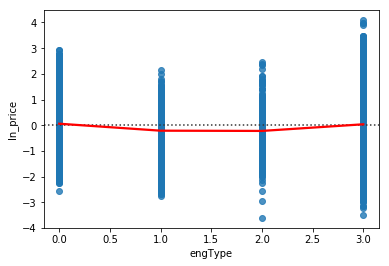

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


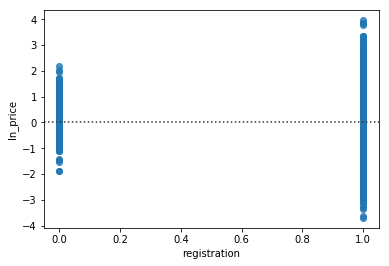

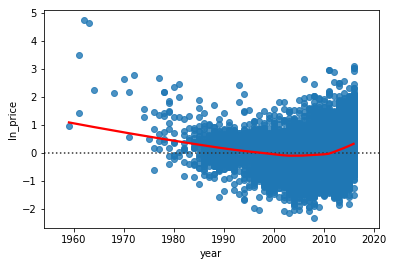

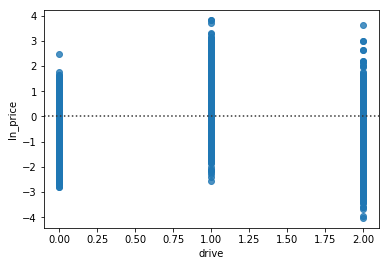

In [16]:
#Use residplot to give a bit more clarity while looking for polynomial candidate
for feature in features:
    sns.residplot(X[feature], y=df['ln_price'], 
                  lowess=True, line_kws=dict(color='r'))
    plt.show()

#milage, engV, year

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [0]:
#Create polynomial features and add to the data frame
def poly_features(df, feature, degrees):
  for degree in range(2, degrees+1):#squaring, going up to however many degrees
    name = f'{feature}^{degree}'#give feature a name
    df[name] = df[feature] ** degree#raise it to however many degrees
  return df

In [18]:
df['mileage^2'] = df['mileage']**2
df['year^2'] = df['year']**2
df = poly_features(df,'engV',3)
df.head(1)

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price,mileage^2,year^2,engV^2,engV^3
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4624,4040100,6.25,15.625


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [0]:
#New Train-Test Split of df
X = df.drop(['price','ln_price'], axis=1)
y = df['ln_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

In [20]:
#new model with all of our fancy new features
model = LinearRegression()
model.fit(X_train,y_train)
X_test['prediction'] = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
#Still not a great RMSE, but R^2 has improved drastically
print('RMSE:',np.sqrt(mean_squared_error(y_true=y_test, y_pred=X_test['prediction'])))
print('R2_Score:',r2_score(y_test,X_test['prediction']))

RMSE: 0.4643510385273342
R2_Score: 0.7750104713842773


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

In [22]:
#show coefficients with their feature
coef = pd.Series(model.coef_, X_train.columns)
print(coef.to_string())

make           -9.810829e-04
body           -5.589188e-02
mileage         3.413021e-04
engV            4.006963e-01
engType        -4.453954e-02
registration    6.856639e-01
year           -6.985478e+00
drive           1.950115e-01
mileage^2       1.198745e-07
year^2          1.768651e-03
engV^2         -1.054502e-02
engV^3          6.618944e-05


With log-linear regression the coefficients are not in absolute units but percentage increases/decreases

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [0]:
#New Train-Test Split of df
X = df.drop(['price','ln_price'], axis=1)
y = df['ln_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

In [45]:
#make our tree model and fit it to the data
a_tree = DecisionTreeRegressor(max_depth=10)
a_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

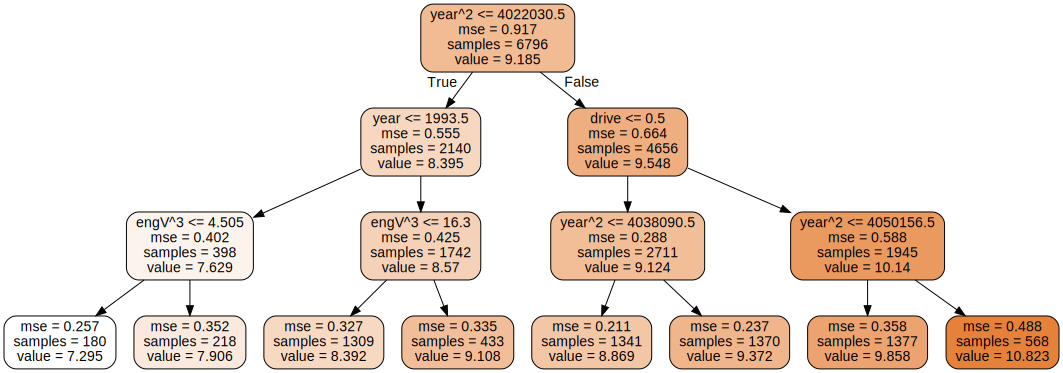

In [40]:
#Not necessary but I like seeing what's going on.

# !pip install graphviz
# !apt-get install graphviz

import graphviz
from IPython.display import display
from sklearn.tree import DecisionTreeRegressor, export_graphviz

#supporting function for tree_disp
def viztree(decision_tree, feature_names):
  """Visualize a decision tree"""
  dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, 
                             filled=True, rounded=True)   
  return graphviz.Source(dot_data)

#Display a regressor decision tree
def regres_tree_disp(X,y,features,depth=3):
  tree = DecisionTreeRegressor(max_depth=depth)
  tree.fit(X,y)
#   print('R^2 Score:', tree.score(X, y)) #Didn't want this R^2 to be mixed up with the one below
  display(viztree(tree, feature_names=features))

#Visualizing 10 is a bit execessive, so dropped to 3 for cleaner notebook
regres_tree_disp(X_train,y_train,list(X_train.columns),3) 

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [46]:
#Solid R^2, could get it higher or lower by changing depth of the tree
print('R^2 Score:', a_tree.score(X_test, y_test))

R^2 Score: 0.886954699374987


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [29]:
#make our OLS model and spit out a summary
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')
print(results.summary())

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2279.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        17:02:57   Log-Likelihood:                -5290.6
No. Observations:                8495   AIC:                         1.061e+04
Df Residuals:                    8482   BIC:                         1.070e+04
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7458.7391    667.439     11.175   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [30]:
#VIF Scores
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           3.432509e+09
make            1.063826e+00
body            1.207724e+00
mileage         7.535526e+00
engV            4.572229e+01
engType         1.171980e+00
registration    1.109079e+00
year            1.647357e+05
drive           1.318462e+00
mileage^2       5.071805e+00
year^2          1.650646e+05
engV^2          5.176441e+02
engV^3          3.133125e+02
dtype: float64

There is a large multicolinearity problem as shown by both our Jarque-Bera score being high, and multiple features with a VIF above 10

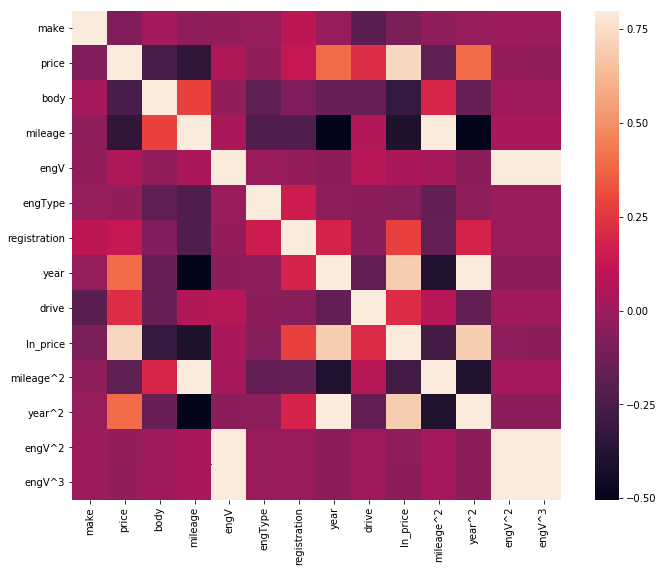

In [31]:
#Correlation heatmap to visualize what VIF is telling us
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

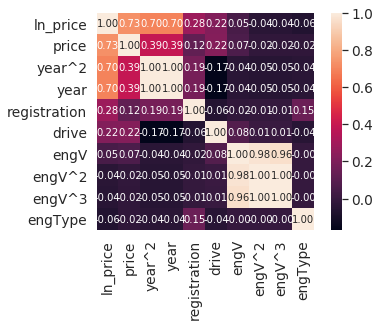

In [32]:
#Restricted heatmap to look at top 10 correlations
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'ln_price')['ln_price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()